In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Machion learning / Deep Learning
########################################
# Linear Regression
df=pd.read_csv('housing.csv')

In [6]:
# Exploratory Data Analysis(EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
target ='Price'     ## ? categorical ? Numerical
feats=[]

In [11]:
df['Price'].nunique()

5000

In [12]:
sns.set_style('whitegrid')

<Axes: xlabel='Price', ylabel='Count'>

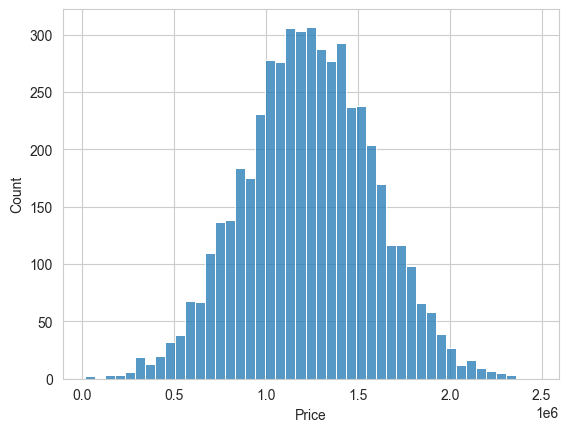

In [13]:
sns.histplot(data=df,x=target)

In [14]:
cols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
      
for col in cols:
    print(col,':',df[col].nunique())

Avg. Area Income : 5000
Avg. Area House Age : 5000
Avg. Area Number of Rooms : 5000
Avg. Area Number of Bedrooms : 255
Area Population : 5000
Price : 5000
Address : 5000


In [15]:
5000/255

19.607843137254903

In [16]:
(100*20)/5000

0.4

In [17]:
5000/4

1250.0

In [18]:
df['Address'].sample(10)

885        62721 Stewart Mount\nMarieburgh, WY 37987-7127
3538     01056 Rhodes Inlet Apt. 361\nToddhaven, IA 76159
4498              6831 Bailey Hollow\nEstesland, UT 59729
1206    536 Thompson Turnpike\nWest Toddfurt, VT 33903...
3212      91410 Megan Camp Suite 360\nLaurafort, OH 15735
589                       USS Robinson\nFPO AE 47460-2918
4030                     PSC 6264, Box 7264\nAPO AE 69725
3743    38922 Clark Spring Apt. 000\nWest Cindy, KS 91072
1186             702 Melissa Key\nWest Lisafurt, WV 54879
367     59380 Jordan Forge Suite 680\nSouth Angela, OH...
Name: Address, dtype: object

In [19]:
drop_cols=['Address']

In [20]:
num_cols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']


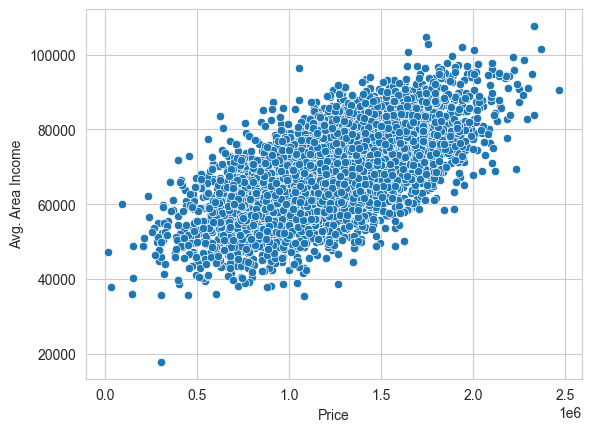

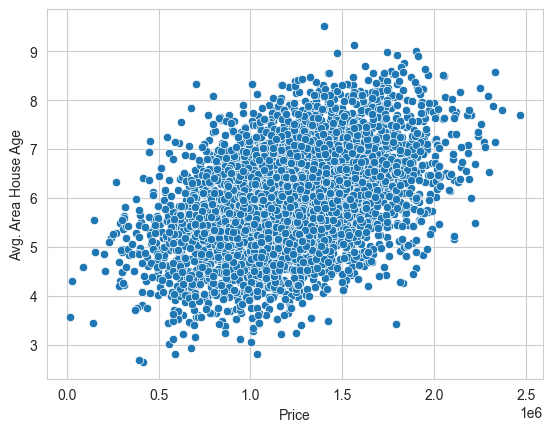

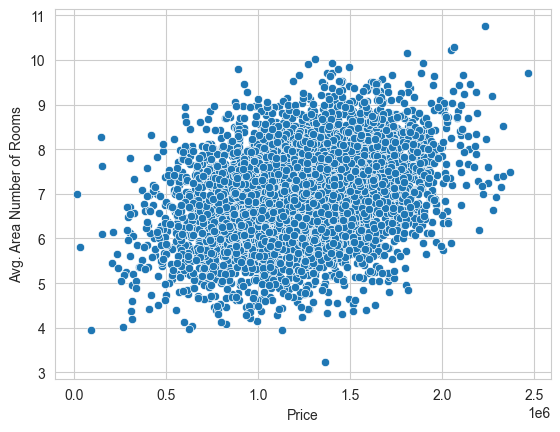

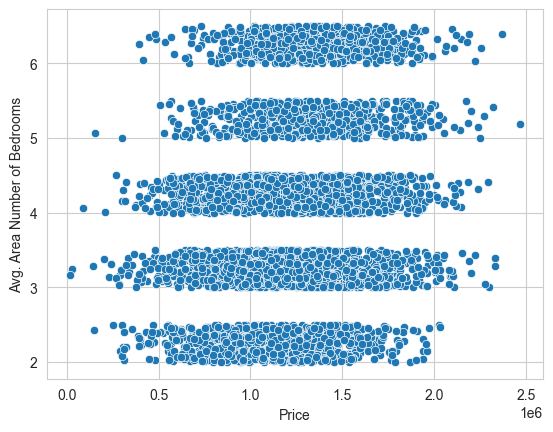

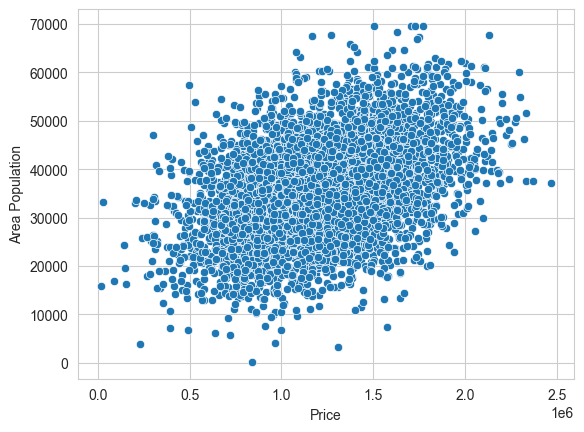

In [21]:
for col in num_cols:
    sns.scatterplot(data=df,x=target,y=col)
    plt.show()

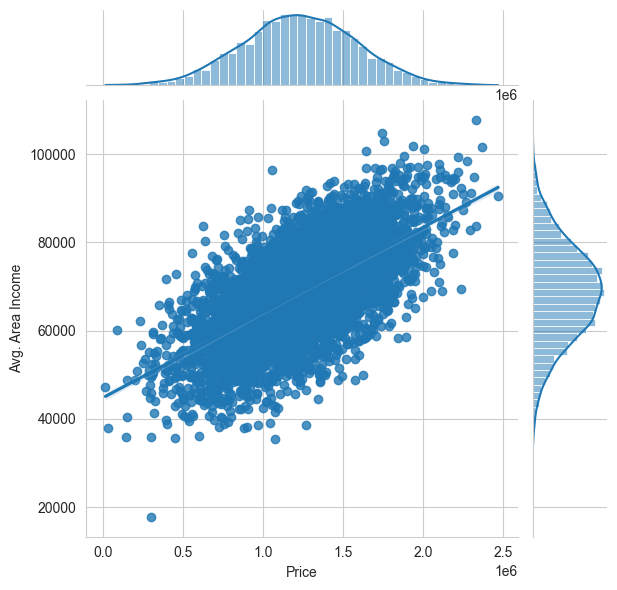

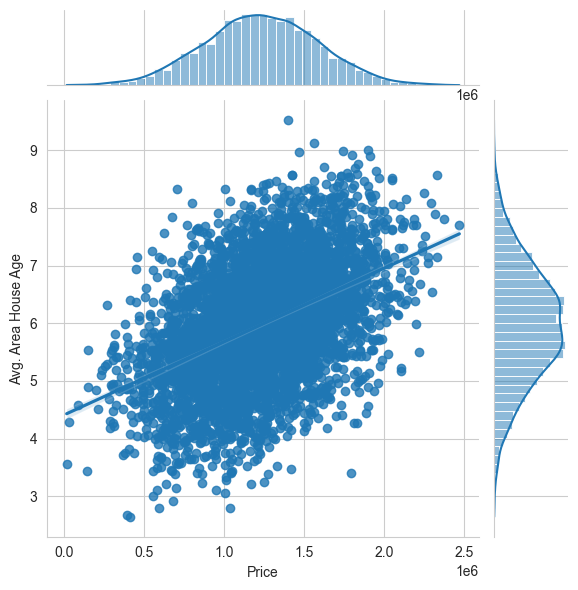

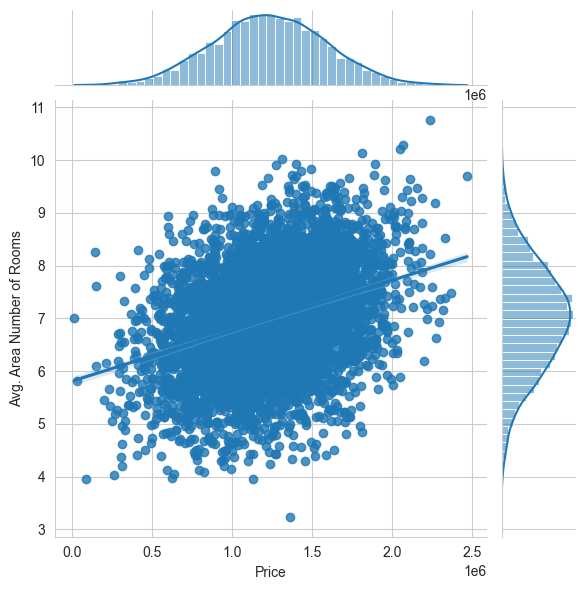

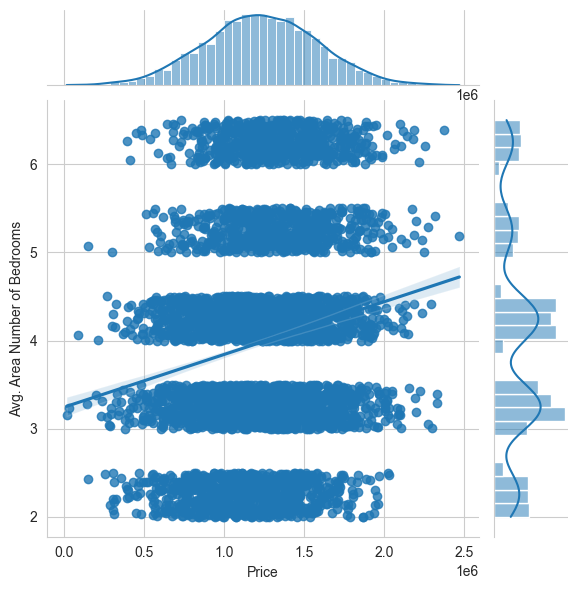

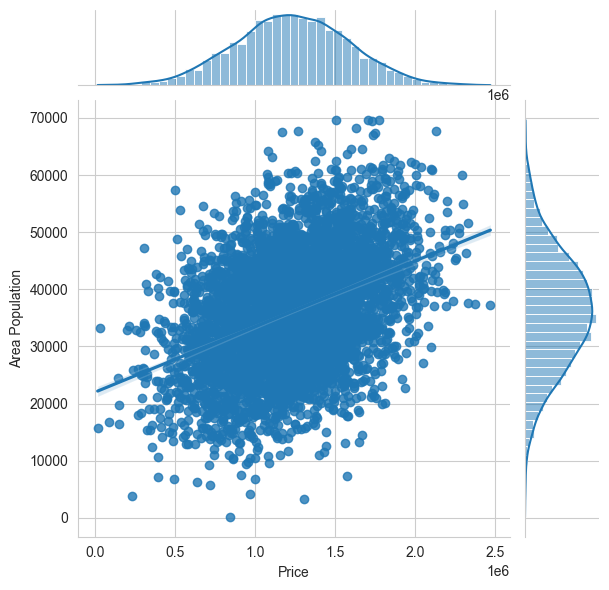

In [22]:
for col in num_cols:
    sns.jointplot(data=df,x=target,y=col,kind='reg')
    plt.show()

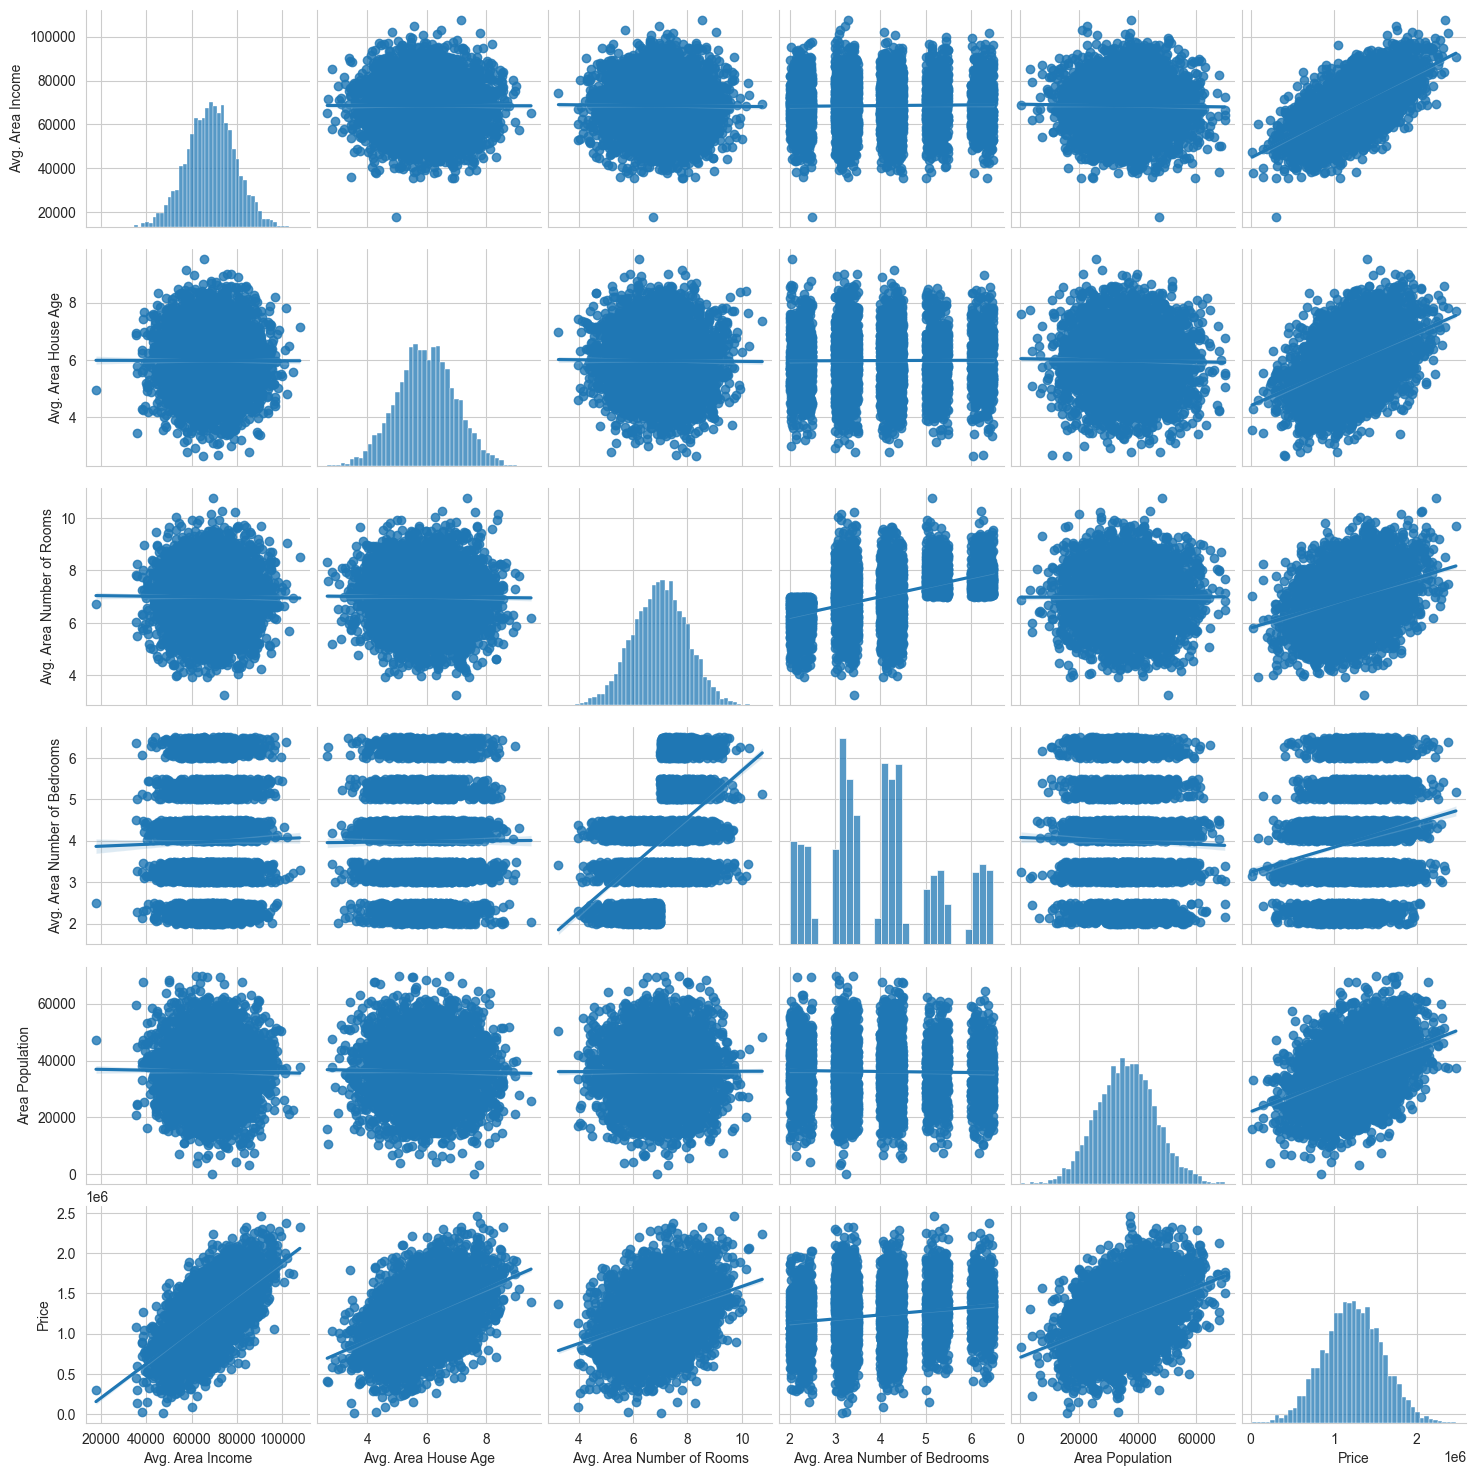

In [23]:
sns.pairplot(df,kind='reg')

<Axes: >

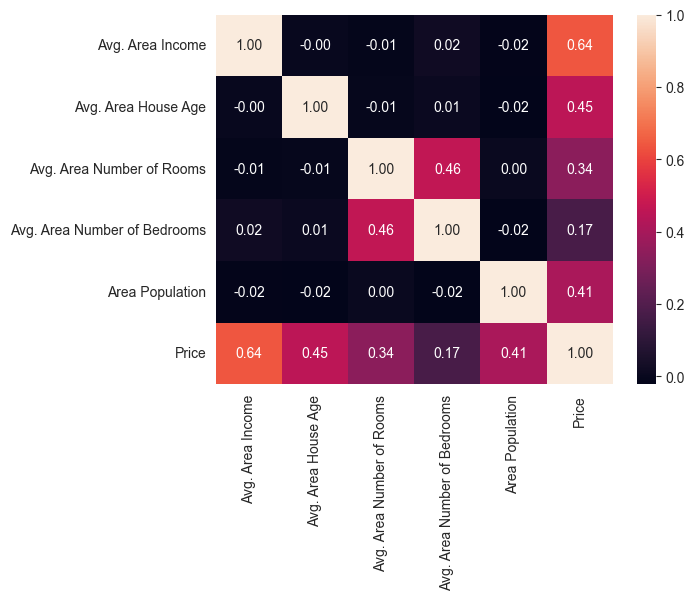

In [24]:
sns.heatmap(df.drop(drop_cols,axis=1).corr(),annot=True,fmt='.2f')

In [25]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
feats +=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']

In [27]:
target

'Price'

In [28]:
features=df[feats]
label=df[target]

In [29]:
features.shape

(5000, 4)

In [30]:
# Data Splitting->Train data and Test data
from sklearn.model_selection import train_test_split

In [31]:
! python -m pip install scikit-learn

In [32]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [33]:
k=train_test_split(features,label,test_size=0.25,random_state=40)



#   train_feat,test_feat,train_label,test_label=

In [34]:
type(k)

list

In [35]:
len(k)


4

In [36]:
k[3]

4088    1.435770e+06
2080    1.668448e+06
41      1.762215e+06
796     1.106261e+06
354     1.051124e+06
            ...     
2952    7.054441e+05
757     1.358647e+06
3907    9.750058e+05
1251    1.393996e+06
4188    1.036277e+06
Name: Price, Length: 1250, dtype: float64

In [37]:
k[-1]

4088    1.435770e+06
2080    1.668448e+06
41      1.762215e+06
796     1.106261e+06
354     1.051124e+06
            ...     
2952    7.054441e+05
757     1.358647e+06
3907    9.750058e+05
1251    1.393996e+06
4188    1.036277e+06
Name: Price, Length: 1250, dtype: float64

In [38]:
k=train_test_split(features,label,test_size=0.25,random_state=40)
train_feat,test_feat,train_label,test_label=k

In [39]:
# Data Splitting->Train data and Test data
from sklearn.model_selection import train_test_split

# train the model
from sklearn.linear_model import LinearRegression

In [40]:
k=train_test_split(features,label,test_size=0.25,random_state=40)
train_feat,test_feat,train_label,test_label=k

In [41]:
model=LinearRegression().fit(train_feat,train_label)

In [42]:
model

LinearRegression()

In [43]:
# Evaluate the Trainned Model
#########################
# Performance Indices
   # Regrression
      # Error-mean absolute error(MAE), MSE,RMSE,r2error
    # Classification
        # Confusion Matrix
        # Precision
        # Recall
        # r2Score
         

In [44]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

In [45]:
model.score(test_feat,test_label)*100


91.44901090752805

In [46]:
# Deploy the Model


In [47]:
model.feature_names_in_

array(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Area Population'], dtype=object)

In [48]:
pred=model.predict

In [244]:

inc = eval(input('Enter Income:'))
age =  eval(input('Enter House of Age:'))
room = eval(input('Enter num of rooms:'))
pop  =   eval(input('Enter population:'))
query=[[inc,age,room,pop]]
pred = model.predict(query)
print(round(pred[0],2))

421673.04


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [245]:
inc=eval(input('Enter Income'))
age=eval(input('Enter House Age'))
room=eval(input('Enter number of rooms'))
pop=eval(input('Enter Population'))
query=[[inc,age,room,pop]]
query=pd.DataFrame(query,columns=model.feature_names_in_)
pred= model.predict(query)
print(round(pred[0],2))

421673.04


In [49]:
model.coef_

array([2.15020699e+01, 1.65916430e+05, 1.21783809e+05, 1.50686194e+01])

In [50]:
coeff=pd.DataFrame(model.coef_,index=model.feature_names_in_,columns=['coeff'])
coeff

,coeff
Avg. Area Income,21.502070
Avg. Area House Age,165916.429626
Avg. Area Number of Rooms,121783.809160
Area Population,15.068619


In [51]:
test_label_pred=model.predict (test_feat)



In [52]:
test_label_pred[0]


1437663.8411458395

<Axes: ylabel='Price'>

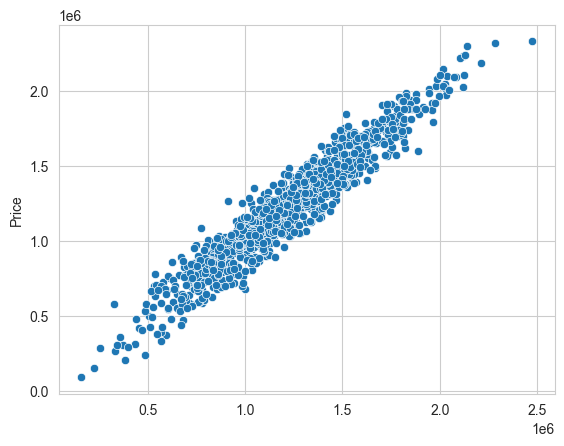

In [53]:
sns.scatterplot(x=test_label_pred,y=test_label)

In [54]:
# Summary
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv('housing.csv')
target='Price'
feats =['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']
features=df[feats]
label=df[target]
k=train_test_split(features,label,test_size=0.25,random_state=40)
train_feat,test_feat,train_label,test_label=k
model=LinearRegression().fit(train_feat,train_label)
print('Test Score:',round(model.score(test_feat,test_label)*100,2),'%')
print('Test Score:',round(model.score(train_feat,train_label)*100,2),'%')


Test Score: 91.45 %
Test Score: 91.91 %


In [55]:
# Save the model
pd.to_pickle(model,'housePricePredictor.pkl')

In [56]:
# Load model
house=pd.read_pickle('housePricePredictor.pkl')
house

LinearRegression()

In [57]:
house=pd.read_pickle('housePricePredictor.pkl')
house.coef_

array([2.15020699e+01, 1.65916430e+05, 1.21783809e+05, 1.50686194e+01])

In [58]:
# Use the prediction model
inc=eval(input('Enter Income'))
age=eval(input('Enter House Age'))
room=eval(input('Enter number of rooms'))
pop=eval(input('Enter Population'))
query=[[inc,age,room,pop]]
query=pd.DataFrame(query,columns=model.feature_names_in_)
pred= model.predict(query)
print(round(pred[0],2))


421673.04


In [5]:
# Summary
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv('housing.csv')
target='Price'
feats =['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']
features=df[feats]
label=df[target]
k=train_test_split(features,label,test_size=0.25,random_state=40)
train_feat,test_feat,train_label,test_label=k
model=LinearRegression().fit(train_feat,train_label)
print('Test Score:',round(model.score(test_feat,test_label)*100,2),'%')
print('Test Score:',round(model.score(train_feat,train_label)*100,2),'%')

# Save the model
pd.to_pickle(model,'housePricePredictor.pkl')


Test Score: 91.45 %
Test Score: 91.91 %


In [6]:
 #Load model
house=pd.read_pickle('housePricePredictor.pkl')
house

# Use the prediction model
inc=eval(input('Enter Income'))
age=eval(input('Enter House Age'))
room=eval(input('Enter number of rooms'))
pop=eval(input('Enter Population'))
query=[[inc,age,room,pop]]
query=pd.DataFrame(query,columns=model.feature_names_in_)
pred= model.predict(query)
print(round(pred[0],2))
